In [700]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [701]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [702]:
df = pd.read_csv("train.csv")

In [703]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understanding the data 

In [704]:
df.shape

(1460, 81)

In [705]:
df.describe([0.25, 0.50, 0.75,0.90, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Cleaning the data

In [707]:
# Finding missing values 
missing_values = round((df.isnull().sum()/len(df.Id))*100, 2)
missing_values.sort_values(inplace=True)
missing_values.loc[missing_values > 0]

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtFinType2     2.60
BsmtExposure     2.60
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
GarageCond       5.55
LotFrontage     17.74
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64

In [708]:
# dropping columns which have higher missing rate, i.e above 45%
df.drop(["FireplaceQu", "Fence", "Alley", "MiscFeature", "PoolQC"], axis=1, inplace=True)

In [709]:
# uniqueness calculation helps me find the catogorical variables
unique_values = [{'column_name':row, 'unique_length':len(df[row].unique()), 'unique_values':df[row].unique()} for row in ['LotFrontage', 'Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure','GarageQual', 'GarageFinish','GarageYrBlt','GarageType','GarageCond']]

In [710]:
unique_values_sorted = pd.DataFrame(unique_values).sort_values("unique_length")
unique_values_sorted

,column_name,unique_length,unique_values
10,GarageFinish,4,"[RFn, Unf, Fin, nan]"
2,MasVnrType,5,"[BrkFace, None, Stone, BrkCmn, nan]"
4,BsmtQual,5,"[Gd, TA, Ex, nan, Fa]"
5,BsmtCond,5,"[TA, Gd, nan, Fa, Po]"
8,BsmtExposure,5,"[No, Gd, Mn, Av, nan]"
1,Electrical,6,"[SBrkr, FuseF, FuseA, FuseP, Mix, nan]"
9,GarageQual,6,"[TA, Fa, Gd, nan, Ex, Po]"
13,GarageCond,6,"[TA, Fa, nan, Gd, Po, Ex]"
6,BsmtFinType1,7,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]"
7,BsmtFinType2,7,"[Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]"


In [711]:
#impute missing values of Electrical with mode due to categorical column
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])
#replace Nan values of MasVnrArea with None i.e. No Masonary type
df.MasVnrType = df.MasVnrType.fillna('None')
 
#replace Nan values of BsmtQual with NA i.e. No Basement
df.BsmtQual = df.BsmtQual.fillna('NA')

#replace Nan values of BsmtCond with NA i.e. No Basement
df.BsmtCond = df.BsmtCond.fillna('NA')

#replace Nan values of BsmtFinType1 with NA i.e. No Basement
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

#replace Nan values of BsmtFinType2 with NA i.e. No Basement
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

#replace Nan values of BsmtExposure with No i.e. No Exposure
df.BsmtExposure = df.BsmtExposure.fillna('No')

#replace Nan values of GarageQual with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageFinish = df.GarageFinish.fillna('NA')

#replace Nan values of GarageYrBlt with 0 i.e. No Garage
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

#replace Nan values of GarageType with NA i.e. No Garage
df.GarageType = df.GarageType.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
df.GarageCond = df.GarageCond.fillna('NA')

#check missing values again
df.isnull().sum()[df.isnull().sum()>0]

#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median()) 

#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())


### Derived new column from exisitng columns

In [712]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt

In [713]:
# dropping columns YrSold and YearBuilt
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [714]:
# validating the missing values after removal
missing_values = round((df.isnull().sum()/len(df.Id))*100, 2)
missing_values.sort_values(inplace=True)
missing_values.loc[missing_values > 0]

Series([], dtype: float64)

In [715]:
df.shape

(1460, 75)

In [716]:
# uniqueness calculation helps me find the catogorical variables
unique_values = [{'column_name':row, 'unique_length':len(df[row].unique()), 'unique_values':df[row].unique()} for row in df.columns.to_list()]

In [717]:
unique_values_sorted = pd.DataFrame(unique_values).sort_values("unique_length")

In [718]:
unique_values_sorted

,column_name,unique_length,unique_values
39,CentralAir,2,"[Y, N]"
5,Street,2,"[Pave, Grvl]"
8,Utilities,2,"[AllPub, NoSeWa]"
46,BsmtHalfBath,3,"[0, 1, 2]"
48,HalfBath,3,"[1, 0, 2]"
...,...,...,...
41,1stFlrSF,753,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1..."
35,BsmtUnfSF,780,"[150, 284, 434, 540, 490, 64, 317, 216, 952, 1..."
44,GrLivArea,861,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209..."
4,LotArea,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."


In [719]:
# Trying to find column with unique values less than 2 
uniques = df.apply(lambda x:x.nunique())
uniques[uniques < 2].index

Index([], dtype='object')

In [720]:
# There are no unique values less than 2 in any columns

In [721]:
df.shape

(1460, 75)

In [722]:
# Found that there are rating features, good to convert them to numerical variables. This will help our analysis

#convert ExterQual Po, Fa, TA, Gd, Ex = 1,2,3,4,5 respectively
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual NA, Po, Fa, TA, Gd, Ex = 0,1,2,3,4,5 respectively
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure  NA, No, Mn, Av, gd = 0,1,2,3,4 respectively
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ = 0,1,2,3,4,5,6 respectively
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC Po, Fa, TA, Gd, Ex = 1,2,3,4,5 respectively
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual Po, Fa, TA, Gd, Ex = 1,2,3,4,5 respectively
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})

df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [724]:
#convert MSSubClass, GarageFinish, LotShape into object type 
convert_dict = {'MSSubClass':object, 'GarageFinish':object, 'LotShape':object, }
df = df.astype(convert_dict)

In [725]:
#calculating the values in each categorical variable:
for col in df.columns:
    if df[col].dtype == np.object_:
        print("Column: ", col)
        print(df[col].value_counts(normalize=True))
        print("-"*30)

Column:  MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
------------------------------
Column:  MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
------------------------------
Column:  Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
------------------------------
Column:  LotShape
3    0.633562
0    0.331507
1    0.028082
2    0.006849
Name: LotShape, dtype: float64
------------------------------
Column:  LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
------------------------------
Column:  Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
-------------

In [726]:
# From above data we realized that some features are having biased data.
# Biased data will produce biased results, so if biased data is more than 80% I am removing them from analysis. 
biased_columns = ['Id', 'Street', 'LandContour','Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual','GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','BsmtFinType2', 'ExterCond','BldgType','Condition1']

df.drop(biased_columns, axis=1, inplace=True)

In [727]:
df.shape

(1460, 54)

In [728]:
# Listing distinct variables for each Categorical columns to address issues if any
for col in df.columns:
    if df[col].dtype == np.object_:
        print("Column: ", col)
        print(df[col].unique())
        print("-"*30)

Column:  MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
------------------------------
Column:  MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
------------------------------
Column:  LotShape
[3 0 1 2]
------------------------------
Column:  LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
------------------------------
Column:  Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
------------------------------
Column:  HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
------------------------------
Column:  RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
------------------------------
Column:  Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'S

In [729]:
## Summary:
# The now contains 1460 rows and 54 columns
# There are 13 categorical features and 41 continuous features 

### Exploratory Data Analysis

<AxesSubplot:>

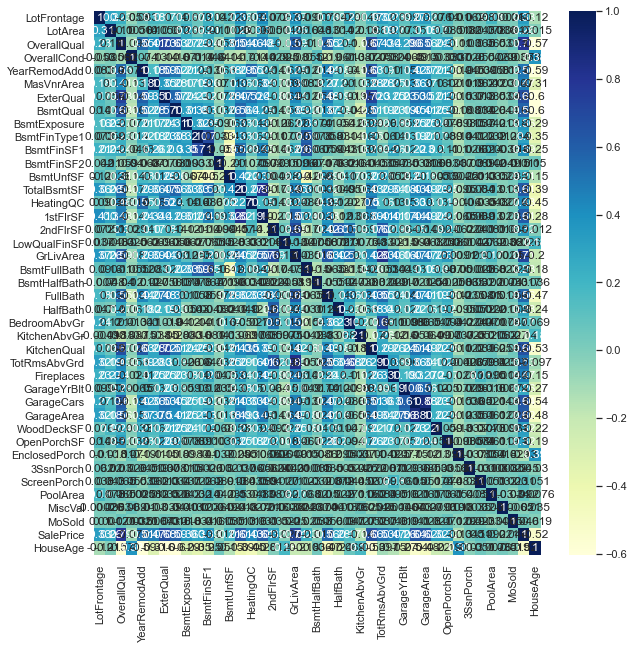

In [730]:
#plt.figure(figsize=(25,25))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True, cmap="YlGnBu")

In [731]:
df[list(df.dtypes[df.dtypes!='object'].index)].corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178469,0.165567,0.141836,0.161535,0.072566,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.334771,-0.116223
LotArea,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103321,0.055570,0.072336,0.232300,0.058995,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.726278,0.629379,0.273214,0.232503,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.125694,-0.138942,-0.164996,-0.071234,-0.014479,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.587318,0.515013,0.207239,0.224383,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.176529,1.000000,0.345329,0.277490,0.170964,0.184728,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311479
ExterQual,0.165567,0.055570,0.726278,-0.138942,0.587318,0.345329,1.000000,0.565558,0.238598,0.226197,...,0.207932,0.291553,-0.149589,0.036934,0.012688,0.034766,-0.039310,0.042790,0.682639,-0.597522
BsmtQual,0.141836,0.072336,0.629379,-0.164996,0.515013,0.277490,0.565558,1.000000,0.313437,0.377398,...,0.252703,0.253999,-0.181533,0.008097,0.034396,0.026415,-0.044404,0.015662,0.585207,-0.602798
BsmtExposure,0.161535,0.232300,0.273214,-0.071234,0.207239,0.170964,0.238598,0.313437,1.000000,0.315449,...,0.241463,0.077725,-0.097883,-0.015150,0.036585,0.041617,-0.013035,0.017957,0.361863,-0.288584
BsmtFinType1,0.072566,0.058995,0.232503,-0.014479,0.224383,0.184728,0.226197,0.377398,0.315449,1.000000,...,0.172112,0.089053,-0.136997,0.040912,0.022252,0.031833,0.012356,-0.034467,0.304908,-0.348123


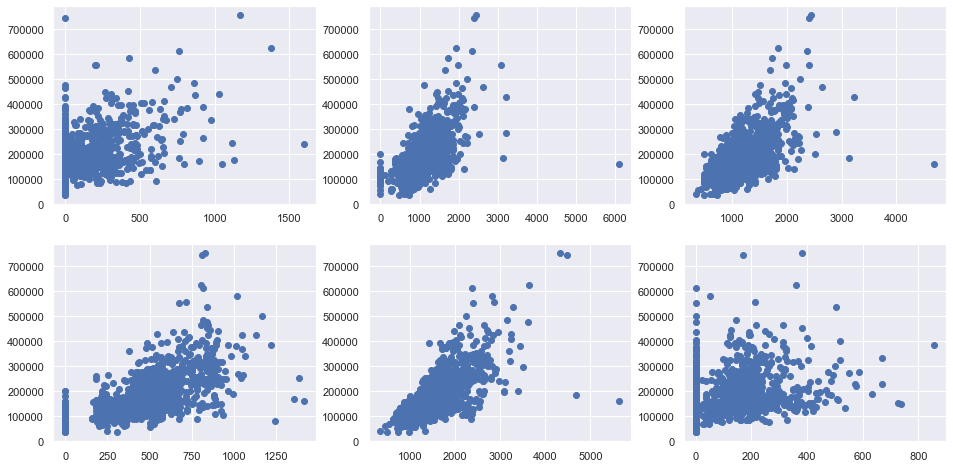

In [732]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df.GarageArea,df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df.GrLivArea,df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df.WoodDeckSF,df.SalePrice)

In [733]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,2,208500,5
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,5,181500,31
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,9,223500,7
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,2,140000,91
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,250000,8


In [734]:
#creating a list of categorical columns
categorical_columns = []
for col in df.columns:
    if df[col].dtype == np.object_:
        categorical_columns.append(col)
print(categorical_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Creating dummy variables for all categorical data 

In [735]:
#create dummy variable for MSSubClass
MSSubClass_df = pd.get_dummies(df['MSSubClass'], drop_first=True, prefix='MSSubClass')
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [736]:
#create dummy variable for MSZoning
MSZoning_df = pd.get_dummies(df['MSZoning'], drop_first=True, prefix='MSZoning')
df = pd.concat([df,MSZoning_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,1,0


In [737]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(df['LotShape'], drop_first=True, prefix='LotShape')
df = pd.concat([df,LotShape_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,1,0,0,0,0


In [738]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(df['LotConfig'], drop_first=True, prefix='LotConfig')
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,1,0,0


In [739]:
#create dummy variable for Neighborhood
Neighborhood_df = pd.get_dummies(df['Neighborhood'], drop_first=True, prefix='Neighborhood')
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [740]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(df['HouseStyle'], drop_first=True, prefix='HouseStyle')
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [741]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(df['RoofStyle'], drop_first=True, prefix='RoofStyle')
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,1,0,0,0,0


In [742]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(df['Exterior1st'], drop_first=True, prefix='Exterior1st')
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [743]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'], drop_first=True, prefix='Exterior2nd')
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [744]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(df['MasVnrType'], drop_first=True, prefix='MasVnrType')
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,0,0,1,0,0,1,0,0


In [745]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(df['Foundation'], drop_first=True, prefix='Foundation')
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,0,1,0,0,0


In [746]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(df['GarageType'], drop_first=True, prefix='GarageType')
df = pd.concat([df,GarageType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,1,0,0,0,1,0,0,0,0,0


In [747]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(df['GarageFinish'], drop_first=True, prefix='GarageFinish')
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,1,0,0
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,0,1,0


In [748]:
# Dropping columns
df=df.drop(columns=categorical_columns, axis=1)

In [749]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,1,0,1,0,0
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,0,1,0,0,0,0,0,0,1,0


In [750]:
# storing cleaned data in another variable for further usage
clean_data_df = df

### Splitting data into train & test

In [751]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 148)
(439, 148)


In [752]:
continuous_columns = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

### Scaling

In [753]:
scaler = StandardScaler()
df_train[continuous_columns] = scaler.fit_transform(df_train[continuous_columns])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,1,0,0
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,1,0,0
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,1,0,0
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,1,0,0


In [754]:
df_train.describe([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,1.628907e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.421156,0.278159,0.244858
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.493986,0.448312,0.430214
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
90%,1.015907e+00,3.615481e-01,1.363132e+00,1.300123e+00,1.020432e+00,1.236374e+00,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
95%,1.604682e+00,6.706810e-01,1.363132e+00,2.216221e+00,1.068988e+00,1.877231e+00,1.051361e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,3.207962e+00,2.510143e+00,2.792775e+00,3.132319e+00,1.166100e+00,4.009148e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [755]:
# split X train and Y train
y_train = df_train.pop('SalePrice')
x_train = df_train

In [756]:
# Running RFE with number of variables 35
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [757]:
rfe = RFE(lm,30)

In [758]:
rfe = rfe.fit(x_train, y_train)

In [759]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 61),
 ('LotArea', False, 52),
 ('OverallQual', True, 1),
 ('OverallCond', False, 71),
 ('YearRemodAdd', False, 110),
 ('MasVnrArea', False, 70),
 ('ExterQual', False, 98),
 ('BsmtQual', False, 2),
 ('BsmtExposure', False, 51),
 ('BsmtFinType1', False, 47),
 ('BsmtFinSF1', False, 23),
 ('BsmtFinSF2', False, 25),
 ('BsmtUnfSF', False, 7),
 ('TotalBsmtSF', False, 24),
 ('HeatingQC', False, 108),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', False, 10),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 118),
 ('FullBath', False, 66),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 79),
 ('KitchenAbvGr', False, 100),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 83),
 ('Fireplaces', False, 104),
 ('GarageYrBlt', False, 68),
 ('GarageCars', False, 30),
 ('GarageArea', False, 103),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 92),
 ('3SsnPorch', False, 65),
 ('ScreenPor

In [760]:
# rejected columns by RFE
rejected_columns = x_train.columns[~rfe.support_]

In [761]:
# accepted columns by RFE
selected_columns = x_train.columns[rfe.support_]

In [762]:
selected_columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120',
       'MSSubClass_160', 'MSZoning_RL', 'LotShape_2', 'LotConfig_FR2',
       'Neighborhood_BrDale', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CBlock',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_1',
       'GarageFinish_2'],
      dtype='object')

### Building model using stats model

In [763]:
# creating x_test based on RFE selected variables
x_train_rfe = x_train[selected_columns]

In [764]:
# adding constant
x_train_rfe = sm.add_constant(x_train_rfe)

In [765]:
lm = sm.OLS(y_train, x_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.94e-324
Time:                        11:16:11   Log-Likelihood:                -12138.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     991   BIC:                         2.448e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.555e+05   4908.836     31.678      0.000    1.46e+05    1.65e+05
OverallQual           2.961e+04   1823.339     16.240      0.000     2.6e+04    3.32e+04
1stFlrSF              2.583e+04   1554.862     16.614      0.000    2.28e+04    2.89e+04
2ndFlrSF              1.729e+04   1488.739     11.616      0.000    1.44e+04    2.02e+04
MSSubClass_120       -1.932e+04   5301.247     -3.645      0.000   -2.97e+04   -8920.802
MSSubClass_160        -2.74e+04   7094.135     -3.862      0.000   -4.13e+04   -1.35e+04
MSZoning_RL           1.249e+04   3405.282      3.668      0.000    5807.481    1.92e+04
LotShape_2           -1.514e+04   1.22e+04     -1.239      0.216   -3.91e+04    8836.341
LotConfig_FR2        -9040.6306   6709.265     -1.347      0.178   -2.22e+04    4125.367
Neighborhood_BrDale   8073.0877   1.25e+04      0.644      0.520   -1.65e+04    3.27e+04
Neighborhood_NoRidge  6.363e+04   6937.007      9.173      0.000       5e+04    7.72e+04
Neighborhood_NridgHt  6.052e+04   5718.389     10.583      0.000    4.93e+04    7.17e+04
Neighborhood_Somerst  3.891e+04   5773.582      6.740      0.000    2.76e+04    5.02e+04
Neighborhood_StoneBr  3.838e+04   1.07e+04      3.579      0.000    1.73e+04    5.94e+04
Neighborhood_Veenker  3.956e+04   1.12e+04      3.528      0.000    1.76e+04    6.16e+04
RoofStyle_Gambrel     1.591e+04   2.09e+04      0.760      0.448   -2.52e+04     5.7e+04
Exterior1st_AsphShn  -6.338e+04   3.61e+04     -1.758      0.079   -1.34e+05    7367.062
Exterior1st_BrkComm  -3.855e+04   2.54e+04     -1.517      0.130   -8.84e+04    1.13e+04
Exterior1st_BrkFace   1.163e+04   6919.449      1.681      0.093   -1949.078    2.52e+04
Exterior1st_CBlock   -1.249e+04    1.8e+04     -0.692      0.489   -4.79e+04    2.29e+04
Exterior1st_ImStucc  -6.985e+04   3.88e+04     -1.801      0.072   -1.46e+05    6276.702
Exterior1st_Stone    -2.658e+04   2.83e+04     -0.939      0.348   -8.21e+04    2.89e+04
Exterior1st_Stucco   -2.139e+04   8381.257     -2.552      0.011   -3.78e+04   -4940.388
Exterior2nd_CBlock   -1.249e+04    1.8e+04     -0.692      0.489   -4.79e+04    2.29e+04
Exterior2nd_ImStucc   3.463e+04   1.37e+04      2.522      0.012    7689.352    6.16e+04
Exterior2nd_Stone     1.561e+04   2.32e+04      0.673      0.501   -2.99e+04    6.11e+04
GarageType_Attchd      2.67e+04   5010.261      5.330      0.000    1.69e+04    3.65e+04
GarageType_BuiltIn    2.126e+04   6850.084      3.104      0.002    7818.311    3.47e+04
GarageType_Detchd     2.006e+04   5421.076      3.700      0.000    9421.722    3.07e+04
GarageFinish_1       -2.006e+04   3572.594     -5.616      0.000   -2.71e+04   -1.31e+04
GarageFinish_2        -1.74e+04   3140.738     -5.541      0.000   -2.36e+04   -1.12e+04
=========================================================

In [766]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
23,Exterior2nd_CBlock,inf
19,Exterior1st_CBlock,inf
0,const,19.26
26,GarageType_Attchd,4.85
28,GarageType_Detchd,4.62
1,OverallQual,2.66
29,GarageFinish_1,2.49
27,GarageType_BuiltIn,2.24
2,1stFlrSF,1.93
3,2ndFlrSF,1.77


##### Dropping Exterior2nd_CBlock as it has high p-value and high VIF  and rebuilding the model

In [767]:
x_train_new = x_train_rfe.drop(['Exterior1st_CBlock'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm2 = sm.OLS(y_train, x_train_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.94e-324
Time:                        11:16:12   Log-Likelihood:                -12138.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     991   BIC:                         2.448e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.555e+05   4908.836     31.678      0.000    1.46e+05    1.65e+05
OverallQual           2.961e+04   1823.339     16.240      0.000     2.6e+04    3.32e+04
1stFlrSF              2.583e+04   1554.862     16.614      0.000    2.28e+04    2.89e+04
2ndFlrSF              1.729e+04   1488.739     11.616      0.000    1.44e+04    2.02e+04
MSSubClass_120       -1.932e+04   5301.247     -3.645      0.000   -2.97e+04   -8920.802
MSSubClass_160        -2.74e+04   7094.135     -3.862      0.000   -4.13e+04   -1.35e+04
MSZoning_RL           1.249e+04   3405.282      3.668      0.000    5807.481    1.92e+04
LotShape_2           -1.514e+04   1.22e+04     -1.239      0.216   -3.91e+04    8836.341
LotConfig_FR2        -9040.6306   6709.265     -1.347      0.178   -2.22e+04    4125.367
Neighborhood_BrDale   8073.0877   1.25e+04      0.644      0.520   -1.65e+04    3.27e+04
Neighborhood_NoRidge  6.363e+04   6937.007      9.173      0.000       5e+04    7.72e+04
Neighborhood_NridgHt  6.052e+04   5718.389     10.583      0.000    4.93e+04    7.17e+04
Neighborhood_Somerst  3.891e+04   5773.582      6.740      0.000    2.76e+04    5.02e+04
Neighborhood_StoneBr  3.838e+04   1.07e+04      3.579      0.000    1.73e+04    5.94e+04
Neighborhood_Veenker  3.956e+04   1.12e+04      3.528      0.000    1.76e+04    6.16e+04
RoofStyle_Gambrel     1.591e+04   2.09e+04      0.760      0.448   -2.52e+04     5.7e+04
Exterior1st_AsphShn  -6.338e+04   3.61e+04     -1.758      0.079   -1.34e+05    7367.062
Exterior1st_BrkComm  -3.855e+04   2.54e+04     -1.517      0.130   -8.84e+04    1.13e+04
Exterior1st_BrkFace   1.163e+04   6919.449      1.681      0.093   -1949.078    2.52e+04
Exterior1st_ImStucc  -6.985e+04   3.88e+04     -1.801      0.072   -1.46e+05    6276.702
Exterior1st_Stone    -2.658e+04   2.83e+04     -0.939      0.348   -8.21e+04    2.89e+04
Exterior1st_Stucco   -2.139e+04   8381.257     -2.552      0.011   -3.78e+04   -4940.388
Exterior2nd_CBlock   -2.497e+04   3.61e+04     -0.692      0.489   -9.58e+04    4.58e+04
Exterior2nd_ImStucc   3.463e+04   1.37e+04      2.522      0.012    7689.352    6.16e+04
Exterior2nd_Stone     1.561e+04   2.32e+04      0.673      0.501   -2.99e+04    6.11e+04
GarageType_Attchd      2.67e+04   5010.261      5.330      0.000    1.69e+04    3.65e+04
GarageType_BuiltIn    2.126e+04   6850.084      3.104      0.002    7818.311    3.47e+04
GarageType_Detchd     2.006e+04   5421.076      3.700      0.000    9421.722    3.07e+04
GarageFinish_1       -2.006e+04   3572.594     -5.616      0.000   -2.71e+04   -1.31e+04
GarageFinish_2        -1.74e+04   3140.738     -5.541      0.000   -2.36e+04   -1.12e+04
==============================================================================
Omnibus:                      264.953   Durbin-Watson:             

In [768]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,19.26
25,GarageType_Attchd,4.85
27,GarageType_Detchd,4.62
1,OverallQual,2.66
28,GarageFinish_1,2.49
26,GarageType_BuiltIn,2.24
2,1stFlrSF,1.93
3,2ndFlrSF,1.77
5,MSSubClass_160,1.73
29,GarageFinish_2,1.58


#### Dropping Exterior2nd_Stone has very high VIF, so dropping it and building model

In [769]:
x_train_new = x_train_new.drop(['Exterior2nd_Stone'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm3 = sm.OLS(y_train, x_train_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     143.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:14   Log-Likelihood:                -12138.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     992   BIC:                         2.448e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.553e+05   4899.619     31.699      0.000    1.46e+05    1.65e+05
OverallQual           2.952e+04   1817.782     16.239      0.000     2.6e+04    3.31e+04
1stFlrSF              2.579e+04   1553.346     16.605      0.000    2.27e+04    2.88e+04
2ndFlrSF              1.728e+04   1488.247     11.613      0.000    1.44e+04    2.02e+04
MSSubClass_120        -1.93e+04   5299.700     -3.642      0.000   -2.97e+04   -8903.605
MSSubClass_160       -2.745e+04   7091.728     -3.871      0.000   -4.14e+04   -1.35e+04
MSZoning_RL           1.259e+04   3401.292      3.701      0.000    5912.374    1.93e+04
LotShape_2            -1.52e+04   1.22e+04     -1.244      0.214   -3.92e+04    8770.247
LotConfig_FR2        -9023.8118   6707.369     -1.345      0.179   -2.22e+04    4138.450
Neighborhood_BrDale   8141.5972   1.25e+04      0.649      0.516   -1.65e+04    3.27e+04
Neighborhood_NoRidge   6.38e+04   6930.968      9.204      0.000    5.02e+04    7.74e+04
Neighborhood_NridgHt  6.069e+04   5710.976     10.628      0.000    4.95e+04    7.19e+04
Neighborhood_Somerst  3.907e+04   5767.195      6.775      0.000    2.78e+04    5.04e+04
Neighborhood_StoneBr  3.854e+04   1.07e+04      3.596      0.000    1.75e+04    5.96e+04
Neighborhood_Veenker  3.947e+04   1.12e+04      3.521      0.000    1.75e+04    6.15e+04
RoofStyle_Gambrel     1.585e+04   2.09e+04      0.757      0.449   -2.52e+04    5.69e+04
Exterior1st_AsphShn  -6.333e+04    3.6e+04     -1.757      0.079   -1.34e+05    7406.342
Exterior1st_BrkComm   -3.87e+04   2.54e+04     -1.523      0.128   -8.85e+04    1.11e+04
Exterior1st_BrkFace    1.22e+04   6865.839      1.777      0.076   -1275.322    2.57e+04
Exterior1st_ImStucc  -6.987e+04   3.88e+04     -1.801      0.072   -1.46e+05    6240.191
Exterior1st_Stone    -1.861e+04   2.57e+04     -0.724      0.469    -6.9e+04    3.18e+04
Exterior1st_Stucco   -2.057e+04   8289.523     -2.481      0.013   -3.68e+04   -4298.188
Exterior2nd_CBlock    -2.52e+04   3.61e+04     -0.699      0.485    -9.6e+04    4.56e+04
Exterior2nd_ImStucc   3.466e+04   1.37e+04      2.525      0.012    7723.609    6.16e+04
GarageType_Attchd      2.68e+04   5006.782      5.353      0.000     1.7e+04    3.66e+04
GarageType_BuiltIn    2.136e+04   6846.467      3.120      0.002    7929.093    3.48e+04
GarageType_Detchd     2.021e+04   5414.711      3.733      0.000    9588.929    3.08e+04
GarageFinish_1       -2.011e+04   3571.080     -5.630      0.000   -2.71e+04   -1.31e+04
GarageFinish_2       -1.742e+04   3139.747     -5.549      0.000   -2.36e+04   -1.13e+04
==============================================================================
Omnibus:                      265.327   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13940.60

In [770]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,19.20
24,GarageType_Attchd,4.85
26,GarageType_Detchd,4.61
1,OverallQual,2.64
27,GarageFinish_1,2.49
25,GarageType_BuiltIn,2.23
2,1stFlrSF,1.93
3,2ndFlrSF,1.77
5,MSSubClass_160,1.73
28,GarageFinish_2,1.58


#### dropping Neighborhood_BrDale , it has very high p-value

In [771]:
x_train_new = x_train_new.drop(['Neighborhood_BrDale'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm4 = sm.OLS(y_train, x_train_new).fit()
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:15   Log-Likelihood:                -12138.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     993   BIC:                         2.447e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.556e+05   4878.585     31.894      0.000    1.46e+05    1.65e+05
OverallQual           2.962e+04   1811.238     16.351      0.000    2.61e+04    3.32e+04
1stFlrSF              2.575e+04   1551.400     16.597      0.000    2.27e+04    2.88e+04
2ndFlrSF              1.722e+04   1484.594     11.599      0.000    1.43e+04    2.01e+04
MSSubClass_120       -1.939e+04   5296.529     -3.661      0.000   -2.98e+04   -8995.176
MSSubClass_160       -2.517e+04   6159.476     -4.086      0.000   -3.73e+04   -1.31e+04
MSZoning_RL           1.234e+04   3378.816      3.652      0.000    5708.555     1.9e+04
LotShape_2            -1.52e+04   1.22e+04     -1.245      0.213   -3.92e+04    8761.178
LotConfig_FR2        -9248.1020   6696.522     -1.381      0.168   -2.24e+04    3892.857
Neighborhood_NoRidge  6.377e+04   6928.813      9.203      0.000    5.02e+04    7.74e+04
Neighborhood_NridgHt   6.05e+04   5701.133     10.611      0.000    4.93e+04    7.17e+04
Neighborhood_Somerst  3.813e+04   5580.663      6.833      0.000    2.72e+04    4.91e+04
Neighborhood_StoneBr  3.827e+04   1.07e+04      3.575      0.000    1.73e+04    5.93e+04
Neighborhood_Veenker  3.948e+04   1.12e+04      3.523      0.000    1.75e+04    6.15e+04
RoofStyle_Gambrel     1.595e+04   2.09e+04      0.762      0.446   -2.51e+04     5.7e+04
Exterior1st_AsphShn  -6.328e+04    3.6e+04     -1.756      0.079   -1.34e+05    7428.962
Exterior1st_BrkComm  -3.863e+04   2.54e+04     -1.521      0.128   -8.85e+04    1.12e+04
Exterior1st_BrkFace   1.218e+04   6863.752      1.774      0.076   -1293.776    2.56e+04
Exterior1st_ImStucc  -7.077e+04   3.87e+04     -1.826      0.068   -1.47e+05    5264.906
Exterior1st_Stone    -1.866e+04   2.57e+04     -0.726      0.468   -6.91e+04    3.17e+04
Exterior1st_Stucco   -2.062e+04   8286.746     -2.488      0.013   -3.69e+04   -4354.059
Exterior2nd_CBlock    -2.51e+04    3.6e+04     -0.696      0.486   -9.58e+04    4.56e+04
Exterior2nd_ImStucc   3.547e+04   1.37e+04      2.596      0.010    8655.128    6.23e+04
GarageType_Attchd     2.683e+04   5005.127      5.360      0.000     1.7e+04    3.67e+04
GarageType_BuiltIn    2.133e+04   6844.234      3.116      0.002    7896.329    3.48e+04
GarageType_Detchd     2.021e+04   5413.134      3.734      0.000    9591.341    3.08e+04
GarageFinish_1       -2.013e+04   3569.799     -5.640      0.000   -2.71e+04   -1.31e+04
GarageFinish_2        -1.75e+04   3136.702     -5.579      0.000   -2.37e+04   -1.13e+04
==============================================================================
Omnibus:                      265.027   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13860.688
Skew:                           0.249   Prob(JB):                         0.00
Kurtosis

##### dropping Exterior2nd_CBlock, it has high p-value and rebuilding model

In [772]:
x_train_new = x_train_new.drop(['Exterior2nd_CBlock'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm5 = sm.OLS(y_train, x_train_new).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:16   Log-Likelihood:                -12138.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     994   BIC:                         2.446e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.557e+05   4876.558     31.920      0.000    1.46e+05    1.65e+05
OverallQual            2.97e+04   1806.868     16.436      0.000    2.62e+04    3.32e+04
1stFlrSF              2.574e+04   1550.975     16.598      0.000    2.27e+04    2.88e+04
2ndFlrSF              1.718e+04   1483.222     11.584      0.000    1.43e+04    2.01e+04
MSSubClass_120        -1.94e+04   5295.139     -3.663      0.000   -2.98e+04   -9007.273
MSSubClass_160       -2.514e+04   6157.749     -4.083      0.000   -3.72e+04   -1.31e+04
MSZoning_RL           1.226e+04   3376.200      3.632      0.000    5638.187    1.89e+04
LotShape_2            -1.52e+04   1.22e+04     -1.245      0.213   -3.92e+04    8755.526
LotConfig_FR2        -9233.6193   6694.754     -1.379      0.168   -2.24e+04    3903.855
Neighborhood_NoRidge  6.379e+04   6926.944      9.209      0.000    5.02e+04    7.74e+04
Neighborhood_NridgHt  6.042e+04   5698.733     10.603      0.000    4.92e+04    7.16e+04
Neighborhood_Somerst  3.808e+04   5578.805      6.827      0.000    2.71e+04     4.9e+04
Neighborhood_StoneBr  3.822e+04   1.07e+04      3.571      0.000    1.72e+04    5.92e+04
Neighborhood_Veenker  3.947e+04   1.12e+04      3.523      0.000    1.75e+04    6.15e+04
RoofStyle_Gambrel     1.609e+04   2.09e+04      0.769      0.442    -2.5e+04    5.71e+04
Exterior1st_AsphShn  -6.322e+04    3.6e+04     -1.755      0.080   -1.34e+05    7468.005
Exterior1st_BrkComm  -3.856e+04   2.54e+04     -1.519      0.129   -8.84e+04    1.13e+04
Exterior1st_BrkFace   1.219e+04   6861.916      1.777      0.076   -1270.793    2.57e+04
Exterior1st_ImStucc  -7.086e+04   3.87e+04     -1.829      0.068   -1.47e+05    5161.441
Exterior1st_Stone    -1.858e+04   2.57e+04     -0.724      0.469    -6.9e+04    3.18e+04
Exterior1st_Stucco   -2.056e+04   8284.206     -2.482      0.013   -3.68e+04   -4302.886
Exterior2nd_ImStucc   3.543e+04   1.37e+04      2.593      0.010    8617.311    6.22e+04
GarageType_Attchd     2.671e+04   5000.651      5.340      0.000    1.69e+04    3.65e+04
GarageType_BuiltIn     2.13e+04   6842.328      3.113      0.002    7870.505    3.47e+04
GarageType_Detchd     1.991e+04   5393.995      3.691      0.000    9324.008    3.05e+04
GarageFinish_1       -1.988e+04   3550.831     -5.600      0.000   -2.69e+04   -1.29e+04
GarageFinish_2       -1.739e+04   3131.904     -5.552      0.000   -2.35e+04   -1.12e+04
==============================================================================
Omnibus:                      264.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13839.711
Skew:                           0.249   Prob(JB):                         0.00
Kurtosis:                      21.030   Cond. No.                         54.4
==================

In [773]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,19.04
22,GarageType_Attchd,4.84
24,GarageType_Detchd,4.58
1,OverallQual,2.61
25,GarageFinish_1,2.46
23,GarageType_BuiltIn,2.23
2,1stFlrSF,1.93
3,2ndFlrSF,1.76
26,GarageFinish_2,1.58
6,MSZoning_RL,1.54


##### dropping Exterior1st_Stone, it has high p-value and rebuilding model

In [774]:
x_train_new = x_train_new.drop(['Exterior1st_Stone'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm6 = sm.OLS(y_train, x_train_new).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:17   Log-Likelihood:                -12139.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     995   BIC:                         2.446e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.556e+05   4874.002     31.919      0.000    1.46e+05    1.65e+05
OverallQual           2.973e+04   1805.906     16.462      0.000    2.62e+04    3.33e+04
1stFlrSF              2.559e+04   1535.772     16.661      0.000    2.26e+04    2.86e+04
2ndFlrSF              1.718e+04   1482.863     11.588      0.000    1.43e+04    2.01e+04
MSSubClass_120       -1.932e+04   5292.885     -3.651      0.000   -2.97e+04   -8937.718
MSSubClass_160       -2.532e+04   6151.552     -4.116      0.000   -3.74e+04   -1.32e+04
MSZoning_RL            1.23e+04   3374.976      3.645      0.000    5678.967    1.89e+04
LotShape_2           -1.497e+04   1.22e+04     -1.227      0.220   -3.89e+04    8972.262
LotConfig_FR2        -9207.7499   6693.057     -1.376      0.169   -2.23e+04    3926.377
Neighborhood_NoRidge  6.399e+04   6919.932      9.247      0.000    5.04e+04    7.76e+04
Neighborhood_NridgHt  6.061e+04   5691.754     10.648      0.000    4.94e+04    7.18e+04
Neighborhood_Somerst  3.819e+04   5575.579      6.849      0.000    2.72e+04    4.91e+04
Neighborhood_StoneBr  3.837e+04   1.07e+04      3.586      0.000    1.74e+04    5.94e+04
Neighborhood_Veenker  3.955e+04   1.12e+04      3.531      0.000    1.76e+04    6.15e+04
RoofStyle_Gambrel     1.609e+04   2.09e+04      0.770      0.442   -2.49e+04    5.71e+04
Exterior1st_AsphShn  -6.296e+04    3.6e+04     -1.748      0.081   -1.34e+05    7712.810
Exterior1st_BrkComm   -3.85e+04   2.54e+04     -1.517      0.130   -8.83e+04    1.13e+04
Exterior1st_BrkFace   1.238e+04   6855.702      1.805      0.071   -1077.276    2.58e+04
Exterior1st_ImStucc  -7.098e+04   3.87e+04     -1.833      0.067   -1.47e+05    5014.815
Exterior1st_Stucco   -2.046e+04   8280.987     -2.470      0.014   -3.67e+04   -4205.635
Exterior2nd_ImStucc   3.552e+04   1.37e+04      2.601      0.009    8718.089    6.23e+04
GarageType_Attchd     2.659e+04   4996.750      5.321      0.000    1.68e+04    3.64e+04
GarageType_BuiltIn    2.117e+04   6838.490      3.096      0.002    7752.440    3.46e+04
GarageType_Detchd     1.977e+04   5389.167      3.668      0.000    9192.121    3.03e+04
GarageFinish_1       -1.974e+04   3544.299     -5.569      0.000   -2.67e+04   -1.28e+04
GarageFinish_2       -1.725e+04   3125.317     -5.519      0.000   -2.34e+04   -1.11e+04
==============================================================================
Omnibus:                      265.614   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13655.010
Skew:                           0.266   Prob(JB):                         0.00
Kurtosis:                      20.908   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors 

##### dropping RoofStyle_Gambrel, it has high p-value and rebuilding model

In [775]:
x_train_new = x_train_new.drop(['RoofStyle_Gambrel'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm7 = sm.OLS(y_train, x_train_new).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:18   Log-Likelihood:                -12139.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     996   BIC:                         2.445e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.557e+05   4869.346     31.980      0.000    1.46e+05    1.65e+05
OverallQual           2.965e+04   1802.901     16.448      0.000    2.61e+04    3.32e+04
1stFlrSF              2.563e+04   1534.399     16.705      0.000    2.26e+04    2.86e+04
2ndFlrSF              1.728e+04   1476.868     11.703      0.000    1.44e+04    2.02e+04
MSSubClass_120       -1.925e+04   5290.857     -3.638      0.000   -2.96e+04   -8864.764
MSSubClass_160       -2.545e+04   6148.040     -4.139      0.000   -3.75e+04   -1.34e+04
MSZoning_RL           1.233e+04   3374.010      3.656      0.000    5714.014     1.9e+04
LotShape_2           -1.497e+04   1.22e+04     -1.227      0.220   -3.89e+04    8966.160
LotConfig_FR2        -8658.3073   6653.499     -1.301      0.193   -2.17e+04    4398.178
Neighborhood_NoRidge  6.387e+04   6916.905      9.234      0.000    5.03e+04    7.74e+04
Neighborhood_NridgHt  6.067e+04   5690.047     10.662      0.000    4.95e+04    7.18e+04
Neighborhood_Somerst  3.823e+04   5574.218      6.858      0.000    2.73e+04    4.92e+04
Neighborhood_StoneBr  3.844e+04   1.07e+04      3.594      0.000    1.74e+04    5.94e+04
Neighborhood_Veenker  3.944e+04   1.12e+04      3.522      0.000    1.75e+04    6.14e+04
Exterior1st_AsphShn  -6.317e+04    3.6e+04     -1.755      0.080   -1.34e+05    7483.272
Exterior1st_BrkComm  -3.858e+04   2.54e+04     -1.521      0.129   -8.84e+04    1.12e+04
Exterior1st_BrkFace   1.236e+04   6854.269      1.803      0.072   -1089.606    2.58e+04
Exterior1st_ImStucc  -7.076e+04   3.87e+04     -1.828      0.068   -1.47e+05    5219.798
Exterior1st_Stucco   -2.059e+04   8277.379     -2.488      0.013   -3.68e+04   -4349.690
Exterior2nd_ImStucc   3.554e+04   1.37e+04      2.602      0.009    8739.335    6.23e+04
GarageType_Attchd     2.641e+04   4990.395      5.292      0.000    1.66e+04    3.62e+04
GarageType_BuiltIn    2.089e+04   6827.018      3.059      0.002    7489.439    3.43e+04
GarageType_Detchd     1.973e+04   5387.782      3.661      0.000    9152.460    3.03e+04
GarageFinish_1       -1.975e+04   3543.529     -5.574      0.000   -2.67e+04   -1.28e+04
GarageFinish_2       -1.724e+04   3124.666     -5.518      0.000   -2.34e+04   -1.11e+04
==============================================================================
Omnibus:                      265.401   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13637.520
Skew:                           0.265   Prob(JB):                         0.00
Kurtosis:                      20.897   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [776]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,19.00
20,GarageType_Attchd,4.83
22,GarageType_Detchd,4.58
1,OverallQual,2.60
23,GarageFinish_1,2.45
21,GarageType_BuiltIn,2.23
2,1stFlrSF,1.89
3,2ndFlrSF,1.75
24,GarageFinish_2,1.57
6,MSZoning_RL,1.54


##### dropping LotShape_2, it has high p-value and rebuilding model

In [777]:
x_train_new = x_train_new.drop(['LotShape_2'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm8 = sm.OLS(y_train, x_train_new).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:19   Log-Likelihood:                -12140.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     997   BIC:                         2.445e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.556e+05   4869.664     31.954      0.000    1.46e+05    1.65e+05
OverallQual           2.968e+04   1803.257     16.458      0.000    2.61e+04    3.32e+04
1stFlrSF              2.541e+04   1523.696     16.674      0.000    2.24e+04    2.84e+04
2ndFlrSF              1.727e+04   1477.188     11.690      0.000    1.44e+04    2.02e+04
MSSubClass_120       -1.918e+04   5291.916     -3.624      0.000   -2.96e+04   -8795.420
MSSubClass_160       -2.562e+04   6147.973     -4.167      0.000   -3.77e+04   -1.36e+04
MSZoning_RL           1.244e+04   3373.773      3.687      0.000    5819.928    1.91e+04
LotConfig_FR2        -8603.8658   6655.041     -1.293      0.196   -2.17e+04    4455.629
Neighborhood_NoRidge  6.431e+04   6909.277      9.308      0.000    5.08e+04    7.79e+04
Neighborhood_NridgHt  6.119e+04   5675.807     10.780      0.000       5e+04    7.23e+04
Neighborhood_Somerst  3.848e+04   5571.949      6.905      0.000    2.75e+04    4.94e+04
Neighborhood_StoneBr  3.882e+04   1.07e+04      3.630      0.000    1.78e+04    5.98e+04
Neighborhood_Veenker  3.973e+04   1.12e+04      3.547      0.000    1.78e+04    6.17e+04
Exterior1st_AsphShn  -6.287e+04    3.6e+04     -1.746      0.081   -1.34e+05    7797.738
Exterior1st_BrkComm  -3.851e+04   2.54e+04     -1.517      0.130   -8.83e+04    1.13e+04
Exterior1st_BrkFace   1.216e+04   6854.047      1.774      0.076   -1290.439    2.56e+04
Exterior1st_ImStucc  -7.109e+04   3.87e+04     -1.836      0.067   -1.47e+05    4905.647
Exterior1st_Stucco   -2.111e+04   8268.863     -2.553      0.011   -3.73e+04   -4880.782
Exterior2nd_ImStucc   3.581e+04   1.37e+04      2.622      0.009    9008.610    6.26e+04
GarageType_Attchd     2.627e+04   4990.384      5.264      0.000    1.65e+04    3.61e+04
GarageType_BuiltIn    2.003e+04   6792.814      2.948      0.003    6698.048    3.34e+04
GarageType_Detchd     1.959e+04   5388.070      3.636      0.000    9019.525    3.02e+04
GarageFinish_1       -1.969e+04   3544.055     -5.555      0.000   -2.66e+04   -1.27e+04
GarageFinish_2       -1.726e+04   3125.419     -5.523      0.000   -2.34e+04   -1.11e+04
==============================================================================
Omnibus:                      264.769   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15251.596
Skew:                           0.169   Prob(JB):                         0.00
Kurtosis:                      21.931   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### dropping LotConfig_FR2, it has high p-value and rebuilding model

In [778]:
x_train_new = x_train_new.drop(['LotConfig_FR2'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm9 = sm.OLS(y_train, x_train_new).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:20   Log-Likelihood:                -12141.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     998   BIC:                         2.444e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.553e+05   4866.257     31.917      0.000    1.46e+05    1.65e+05
OverallQual            2.96e+04   1802.819     16.418      0.000    2.61e+04    3.31e+04
1stFlrSF              2.553e+04   1521.053     16.786      0.000    2.25e+04    2.85e+04
2ndFlrSF              1.737e+04   1475.384     11.776      0.000    1.45e+04    2.03e+04
MSSubClass_120       -1.914e+04   5293.622     -3.616      0.000   -2.95e+04   -8755.821
MSSubClass_160       -2.594e+04   6145.020     -4.221      0.000    -3.8e+04   -1.39e+04
MSZoning_RL           1.245e+04   3374.905      3.688      0.000    5822.564    1.91e+04
Neighborhood_NoRidge  6.391e+04   6904.474      9.256      0.000    5.04e+04    7.75e+04
Neighborhood_NridgHt  6.103e+04   5676.405     10.751      0.000    4.99e+04    7.22e+04
Neighborhood_Somerst  3.839e+04   5573.422      6.888      0.000    2.75e+04    4.93e+04
Neighborhood_StoneBr  3.914e+04   1.07e+04      3.660      0.000    1.82e+04    6.01e+04
Neighborhood_Veenker  3.752e+04   1.11e+04      3.389      0.001    1.58e+04    5.92e+04
Exterior1st_AsphShn  -6.273e+04    3.6e+04     -1.741      0.082   -1.33e+05    7966.944
Exterior1st_BrkComm  -3.835e+04   2.54e+04     -1.510      0.131   -8.82e+04    1.15e+04
Exterior1st_BrkFace   1.256e+04   6849.506      1.833      0.067    -885.614     2.6e+04
Exterior1st_ImStucc  -7.082e+04   3.87e+04     -1.828      0.068   -1.47e+05    5206.201
Exterior1st_Stucco   -2.102e+04   8271.382     -2.542      0.011   -3.73e+04   -4790.692
Exterior2nd_ImStucc   3.609e+04   1.37e+04      2.642      0.008    9287.143    6.29e+04
GarageType_Attchd     2.614e+04   4991.077      5.238      0.000    1.63e+04    3.59e+04
GarageType_BuiltIn     1.98e+04   6792.792      2.915      0.004    6469.315    3.31e+04
GarageType_Detchd     1.963e+04   5389.822      3.641      0.000    9049.056    3.02e+04
GarageFinish_1       -1.954e+04   3543.405     -5.515      0.000   -2.65e+04   -1.26e+04
GarageFinish_2       -1.696e+04   3117.715     -5.440      0.000   -2.31e+04   -1.08e+04
==============================================================================
Omnibus:                      264.997   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15322.278
Skew:                           0.169   Prob(JB):                         0.00
Kurtosis:                      21.975   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### dropping Exterior1st_BrkComm, it has high p-value and rebuilding model

In [779]:
x_train_new = x_train_new.drop(['Exterior1st_BrkComm'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm10 = sm.OLS(y_train, x_train_new).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:20   Log-Likelihood:                -12142.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     999   BIC:                         2.444e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.556e+05   4866.788     31.963      0.000    1.46e+05    1.65e+05
OverallQual           2.976e+04   1800.981     16.522      0.000    2.62e+04    3.33e+04
1stFlrSF              2.549e+04   1521.707     16.748      0.000    2.25e+04    2.85e+04
2ndFlrSF              1.739e+04   1476.307     11.777      0.000    1.45e+04    2.03e+04
MSSubClass_120       -1.918e+04   5296.956     -3.621      0.000   -2.96e+04   -8786.816
MSSubClass_160       -2.596e+04   6148.949     -4.221      0.000    -3.8e+04   -1.39e+04
MSZoning_RL           1.231e+04   3375.795      3.645      0.000    5680.839    1.89e+04
Neighborhood_NoRidge  6.378e+04   6908.348      9.232      0.000    5.02e+04    7.73e+04
Neighborhood_NridgHt  6.091e+04   5679.506     10.724      0.000    4.98e+04    7.21e+04
Neighborhood_Somerst  3.821e+04   5575.777      6.854      0.000    2.73e+04    4.92e+04
Neighborhood_StoneBr  3.902e+04   1.07e+04      3.647      0.000     1.8e+04       6e+04
Neighborhood_Veenker  3.753e+04   1.11e+04      3.387      0.001    1.58e+04    5.93e+04
Exterior1st_AsphShn  -6.264e+04    3.6e+04     -1.738      0.083   -1.33e+05    8103.646
Exterior1st_BrkFace   1.269e+04   6853.349      1.851      0.064    -762.453    2.61e+04
Exterior1st_ImStucc  -7.093e+04   3.88e+04     -1.830      0.068   -1.47e+05    5137.195
Exterior1st_Stucco   -2.094e+04   8276.507     -2.530      0.012   -3.72e+04   -4699.183
Exterior2nd_ImStucc   3.622e+04   1.37e+04      2.650      0.008    9396.840     6.3e+04
GarageType_Attchd     2.598e+04   4993.092      5.203      0.000    1.62e+04    3.58e+04
GarageType_BuiltIn    1.958e+04   6795.655      2.882      0.004    6248.821    3.29e+04
GarageType_Detchd      1.95e+04   5392.610      3.616      0.000    8915.652    3.01e+04
GarageFinish_1       -1.966e+04   3544.788     -5.546      0.000   -2.66e+04   -1.27e+04
GarageFinish_2       -1.692e+04   3119.613     -5.425      0.000    -2.3e+04   -1.08e+04
==============================================================================
Omnibus:                      263.654   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15180.505
Skew:                           0.154   Prob(JB):                         0.00
Kurtosis:                      21.888   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### dropping Exterior1st_AsphShn, it has high p-value and rebuilding model

In [780]:
x_train_new = x_train_new.drop(['Exterior1st_AsphShn'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm11 = sm.OLS(y_train, x_train_new).fit()
lm11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:21   Log-Likelihood:                -12143.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1000   BIC:                         2.443e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.548e+05   4853.209     31.901      0.000    1.45e+05    1.64e+05
OverallQual            2.98e+04   1802.615     16.532      0.000    2.63e+04    3.33e+04
1stFlrSF              2.535e+04   1521.189     16.663      0.000    2.24e+04    2.83e+04
2ndFlrSF              1.739e+04   1477.795     11.768      0.000    1.45e+04    2.03e+04
MSSubClass_120       -1.923e+04   5302.236     -3.626      0.000   -2.96e+04   -8822.170
MSSubClass_160       -2.611e+04   6154.497     -4.243      0.000   -3.82e+04    -1.4e+04
MSZoning_RL           1.218e+04   3378.434      3.605      0.000    5550.687    1.88e+04
Neighborhood_NoRidge  6.386e+04   6915.143      9.235      0.000    5.03e+04    7.74e+04
Neighborhood_NridgHt  6.103e+04   5684.818     10.736      0.000    4.99e+04    7.22e+04
Neighborhood_Somerst  3.816e+04   5581.302      6.836      0.000    2.72e+04    4.91e+04
Neighborhood_StoneBr  3.913e+04   1.07e+04      3.653      0.000    1.81e+04    6.02e+04
Neighborhood_Veenker  3.754e+04   1.11e+04      3.385      0.001    1.58e+04    5.93e+04
Exterior1st_BrkFace   1.291e+04   6859.012      1.883      0.060    -545.976    2.64e+04
Exterior1st_ImStucc  -7.099e+04   3.88e+04     -1.829      0.068   -1.47e+05    5155.652
Exterior1st_Stucco   -2.082e+04   8284.589     -2.514      0.012   -3.71e+04   -4567.447
Exterior2nd_ImStucc   3.627e+04   1.37e+04      2.651      0.008    9422.963    6.31e+04
GarageType_Attchd     2.679e+04   4976.158      5.384      0.000     1.7e+04    3.66e+04
GarageType_BuiltIn    2.032e+04   6789.339      2.993      0.003    6995.691    3.36e+04
GarageType_Detchd     2.018e+04   5383.824      3.748      0.000    9612.743    3.07e+04
GarageFinish_1       -1.957e+04   3547.985     -5.516      0.000   -2.65e+04   -1.26e+04
GarageFinish_2       -1.686e+04   3122.523     -5.398      0.000    -2.3e+04   -1.07e+04
==============================================================================
Omnibus:                      262.988   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14814.679
Skew:                           0.166   Prob(JB):                         0.00
Kurtosis:                      21.658   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### dropping Exterior1st_BrkFace, it has high p-value and rebuilding model

In [781]:
x_train_new = x_train_new.drop(['Exterior1st_BrkFace'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm12 = sm.OLS(y_train, x_train_new).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                -12145.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1001   BIC:                         2.443e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.553e+05   4853.842     31.986      0.000    1.46e+05    1.65e+05
OverallQual            2.97e+04   1804.157     16.463      0.000    2.62e+04    3.32e+04
1stFlrSF              2.581e+04   1503.224     17.170      0.000    2.29e+04    2.88e+04
2ndFlrSF              1.728e+04   1478.589     11.689      0.000    1.44e+04    2.02e+04
MSSubClass_120       -1.896e+04   5307.051     -3.572      0.000   -2.94e+04   -8544.292
MSSubClass_160        -2.57e+04   6158.415     -4.173      0.000   -3.78e+04   -1.36e+04
MSZoning_RL           1.229e+04   3382.260      3.632      0.000    5648.687    1.89e+04
Neighborhood_NoRidge  6.372e+04   6923.534      9.204      0.000    5.01e+04    7.73e+04
Neighborhood_NridgHt  6.016e+04   5673.080     10.604      0.000     4.9e+04    7.13e+04
Neighborhood_Somerst  3.784e+04   5585.828      6.774      0.000    2.69e+04    4.88e+04
Neighborhood_StoneBr   3.83e+04   1.07e+04      3.574      0.000    1.73e+04    5.93e+04
Neighborhood_Veenker  4.036e+04    1.1e+04      3.668      0.000    1.88e+04    6.19e+04
Exterior1st_ImStucc  -7.105e+04   3.89e+04     -1.829      0.068   -1.47e+05    5197.934
Exterior1st_Stucco   -2.138e+04   8289.787     -2.579      0.010   -3.77e+04   -5116.131
Exterior2nd_ImStucc   3.562e+04   1.37e+04      2.601      0.009    8749.493    6.25e+04
GarageType_Attchd     2.657e+04   4981.149      5.335      0.000    1.68e+04    3.63e+04
GarageType_BuiltIn    2.052e+04   6797.130      3.019      0.003    7180.562    3.39e+04
GarageType_Detchd     2.016e+04   5390.654      3.740      0.000    9580.302    3.07e+04
GarageFinish_1       -1.956e+04   3552.487     -5.506      0.000   -2.65e+04   -1.26e+04
GarageFinish_2       -1.682e+04   3126.428     -5.380      0.000    -2.3e+04   -1.07e+04
==============================================================================
Omnibus:                      262.979   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15289.454
Skew:                           0.131   Prob(JB):                         0.00
Kurtosis:                      21.956   Cond. No.                         54.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### dropping Exterior1st_ImStucc, it has high p-value and rebuilding model

In [782]:
x_train_new = x_train_new.drop(['Exterior1st_ImStucc'],axis=1)
x_train_new = sm.add_constant(x_train_new)
lm13 = sm.OLS(y_train, x_train_new).fit()
lm13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     220.0
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                -12147.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1002   BIC:                         2.443e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.552e+05   4859.340     31.935      0.000    1.46e+05    1.65e+05
OverallQual            2.96e+04   1805.359     16.394      0.000    2.61e+04    3.31e+04
1stFlrSF              2.591e+04   1504.021     17.226      0.000     2.3e+04    2.89e+04
2ndFlrSF              1.749e+04   1475.944     11.851      0.000    1.46e+04    2.04e+04
MSSubClass_120       -1.861e+04   5309.885     -3.505      0.000    -2.9e+04   -8193.201
MSSubClass_160       -2.548e+04   6164.434     -4.133      0.000   -3.76e+04   -1.34e+04
MSZoning_RL           1.238e+04   3385.834      3.656      0.000    5734.192     1.9e+04
Neighborhood_NoRidge  6.187e+04   6856.620      9.023      0.000    4.84e+04    7.53e+04
Neighborhood_NridgHt   6.01e+04   5679.637     10.582      0.000     4.9e+04    7.12e+04
Neighborhood_Somerst  3.785e+04   5592.352      6.768      0.000    2.69e+04    4.88e+04
Neighborhood_StoneBr  3.814e+04   1.07e+04      3.555      0.000    1.71e+04    5.92e+04
Neighborhood_Veenker   4.03e+04    1.1e+04      3.658      0.000    1.87e+04    6.19e+04
Exterior1st_Stucco   -2.155e+04   8298.986     -2.596      0.010   -3.78e+04   -5262.748
Exterior2nd_ImStucc   2.708e+04   1.29e+04      2.101      0.036    1785.392    5.24e+04
GarageType_Attchd      2.67e+04   4986.518      5.354      0.000    1.69e+04    3.65e+04
GarageType_BuiltIn    2.061e+04   6804.878      3.029      0.003    7259.775     3.4e+04
GarageType_Detchd     2.017e+04   5396.950      3.737      0.000    9580.409    3.08e+04
GarageFinish_1       -1.953e+04   3556.600     -5.491      0.000   -2.65e+04   -1.25e+04
GarageFinish_2       -1.702e+04   3128.231     -5.439      0.000   -2.32e+04   -1.09e+04
==============================================================================
Omnibus:                      265.985   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15765.000
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                      22.248   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [783]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,18.75
14,GarageType_Attchd,4.78
16,GarageType_Detchd,4.55
1,OverallQual,2.59
17,GarageFinish_1,2.45
15,GarageType_BuiltIn,2.19
2,1stFlrSF,1.80
3,2ndFlrSF,1.73
18,GarageFinish_2,1.56
6,MSZoning_RL,1.53


###  Above is final model as all variables have VIF < 0.05 and p values < 0.05
### we are not certain that above model is reliable so we do residual analysis

# Residual Analysis

#### this helps to check the error terms are normally distributed, so that relay on the model

In [784]:
y_train_pred = lm13.predict(x_train_new)

<AxesSubplot:title={'center':'Error Terms'}, xlabel='Errors', ylabel='Density'>

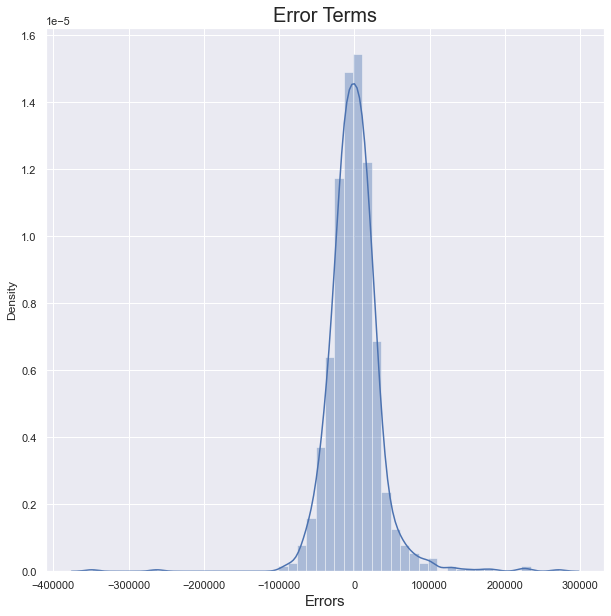

In [785]:
res = y_train - y_train_pred
plt.title("Error Terms", fontsize=20)
plt.xlabel('Errors', fontsize =15)       
sns.distplot(res)

In [786]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,4)

0.7981

In [787]:
# Residual analysis
y_res = (y_train - y_train_pred)

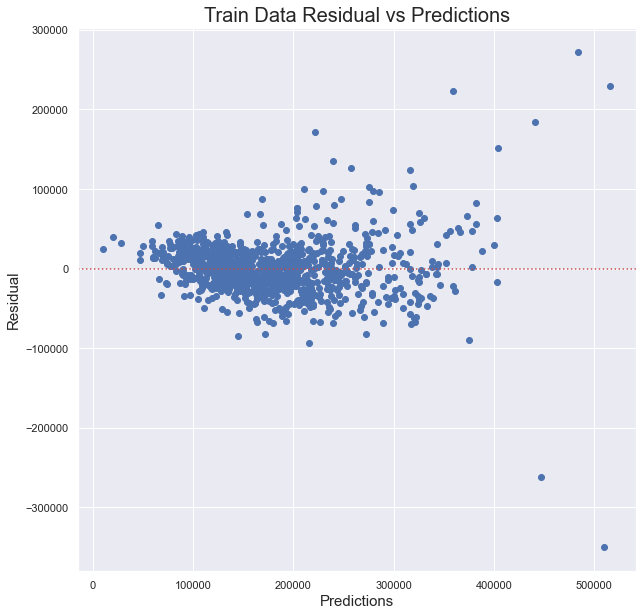

In [788]:
plt.scatter(y_train_pred, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.title("Train Data Residual vs Predictions", fontsize=20)
plt.xlabel("Predictions", fontsize=15)
plt.ylabel("Residual", fontsize=15)
plt.show()

# Prediction and evaluaiton on Test set

#### Scaling Test data

In [789]:
df_test[continuous_columns] = scaler.transform(df_test[continuous_columns])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,1,0,0
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,1


In [790]:
# split X test and Y test
y_test = df_test.pop('SalePrice')
x_test = df_test

# add constant
x_test_sm = sm.add_constant(x_test)

In [791]:
#trained model columns
x_train_new.columns

Index(['const', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120',
       'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_Stucco', 'Exterior2nd_ImStucc',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_1', 'GarageFinish_2'],
      dtype='object')

In [792]:
x_train_new.drop(['const'], axis=1, inplace=True)
# taking only the columns used in train data
x_test_new = x_test[x_train_new.columns]

In [793]:
# Adding constant 
x_test_new = sm.add_constant(x_test_new)

In [794]:
# predictions on test
y_test_pred = lm13.predict(x_test_new)

In [795]:
# R2 score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7952939354126357

In [796]:
x_test_new = x_test_new.drop(['const'], axis=1)

Text(0, 0.5, 'y_pred')

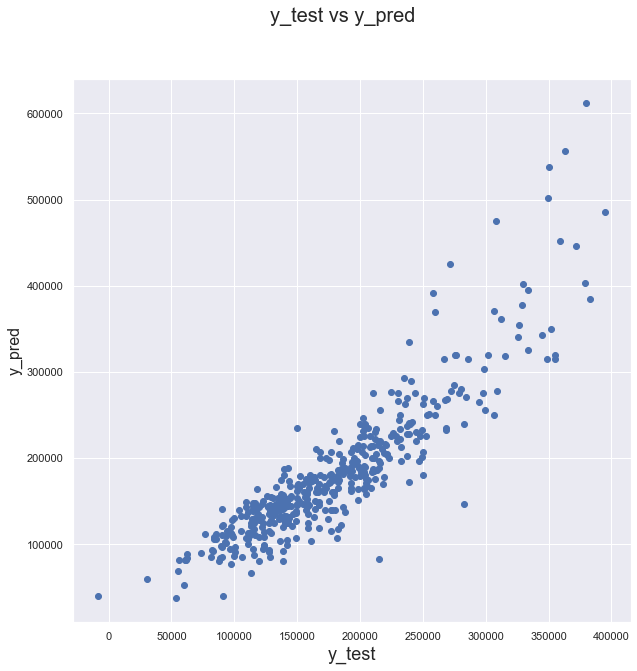

In [797]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_pred, y_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [798]:
# above plot shows model is able to generalize the data pretty well

In [799]:
# The final features used in model are :


In [800]:
columns = x_train_new.columns
columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120',
       'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_Stucco', 'Exterior2nd_ImStucc',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_1', 'GarageFinish_2'],
      dtype='object')

#### Finally we have 18 features significant in predicting the price of a house
#### R2 Train : 79.85%
#### R2 Test: 79.53%

## Ridge Regression

In [801]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [802]:
# Best hyperparameter for Ridge
model_cv.best_params_

{'alpha': 5.0}

In [803]:
# Fetchign the coefficients for best hyperparameter 5
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_new, y_train)
print(ridge.coef_)

[ 31474.02530916  26325.12710047  17603.07459427 -13977.82530839
 -20213.65052087  12937.50792577  51441.51566607  50209.27248446
  31394.47960571  22471.706396    25514.39594779 -18166.58601645
  16265.47069518  21573.32813169  15970.05419112  14437.86942767
 -17511.8176759  -15037.09517873]


In [804]:
# Calculating R2 score for lambda = 5
y_pred_train = ridge.predict(x_train_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = ridge.predict(x_test_new)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.796006193506688
0.7892823233258629


In [805]:
# If I double the hyperparameter(10) inorder to see the results
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_new, y_train)
print(ridge.coef_)

[ 32601.48378939  26574.24965249  17671.23604188 -11454.09192412
 -16911.55157805  12998.72036047  44211.44453135  43707.00385118
  26986.31525386  15285.01812602  18470.2870314  -15598.10317119
  11667.55140448  18420.11840898  13159.8025837   10817.8576483
 -16203.42521637 -13625.93426117]


In [806]:
# Calculating R2 score for lambda = 10
y_pred_train = ridge.predict(x_train_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_pred_test = ridge.predict(x_test_new)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.7927878873749438
0.7851243997401344


#### After doubling the alpha of ridge, the co efficients increased and R2 score have decreased by 0.4

## Lasso

In [807]:
lasso = Lasso()
# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(x_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [808]:
# Best hyperparameter for Ridge
model_cv_lasso.best_params_

{'alpha': 100}

In [809]:
#Fitting Ridge model for alpha = 100 and coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_new, y_train) 
lasso.coef_

array([ 30964.56567465,  26083.58695901,  17456.63726433, -14006.7836008 ,
       -20926.18297771,  12727.07443512,  58129.81796689,  54741.72759739,
        33686.17412233,  25249.08534636,  28907.53569353, -16779.23032261,
        12975.83579883,  20753.79897336,  14693.87748579,  13190.33915454,
       -16751.1002914 , -14761.33839558])

In [810]:
# Calculating R2 score for lambda = 100
y_pred_train = lasso.predict(x_train_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_pred_test = lasso.predict(x_test_new)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.7966617091674025
0.7897504552290575


In [811]:
#Fitting Ridge model for alpha = 200 and coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_new, y_train) 
lasso.coef_

array([ 32325.95064262,  26255.35994263,  17425.93835075,  -9424.17787797,
       -16405.7657022 ,  13069.63890646,  54335.15908182,  49405.12891154,
        29532.9678532 ,  12385.53036273,  17531.86899273, -12003.09749124,
            0.        ,  14836.23938375,   8775.83857408,   6243.16523866,
       -14000.03850092, -12521.17287654])

In [812]:
# Calculating R2 score for lambda = 200
y_pred_train = lasso.predict(x_train_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_pred_test = lasso.predict(x_test_new)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.7925348225268938
0.781309817537045


#### After doubling the alpha of lasso, the co efficients increased and  one feature was removed,  R2 score have decreased by 0.8

### creating a data frame for all features selected 

In [813]:
features = pd.DataFrame(index=x_train_new.columns)

In [814]:
features['Linear'] = lm.params
features['Ridge'] = ridge.coef_
features['Lasso'] = lasso.coef_

In [815]:
features.head(20)

,Linear,Ridge,Lasso
OverallQual,29610.561431,32601.483789,32325.950643
1stFlrSF,25832.351342,26574.249652,26255.359943
2ndFlrSF,17293.120781,17671.236042,17425.938351
MSSubClass_120,-19323.759426,-11454.091924,-9424.177878
MSSubClass_160,-27397.103454,-16911.551578,-16405.765702
MSZoning_RL,12489.872817,12998.720360,13069.638906
Neighborhood_NoRidge,63634.342005,44211.444531,54335.159082
Neighborhood_NridgHt,60519.581925,43707.003851,49405.128912
Neighborhood_Somerst,38914.143285,26986.315254,29532.967853
Neighborhood_StoneBr,38378.653182,15285.018126,12385.530363


### Drop the Top 5 features and rebuild lasso

In [816]:
top_features = ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'OverallQual', 'Neighborhood_Veenker']

In [817]:
top_features_dropped_train = x_train_new.drop(top_features, axis=1)

In [818]:
top_features_dropped_test = x_test_new.drop(top_features, axis=1)

In [819]:
lasso = Lasso()
# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(top_features_dropped_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [820]:
model_cv_lasso.best_params_

{'alpha': 100}

In [821]:
#Fitting Ridge model for alpha = 100 and coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(top_features_dropped_train, y_train) 
lasso.coef_

array([ 44919.60713355,  30688.00297243,   5074.96613498,   6467.24687529,
         4003.51412512,  27450.42955217, -23292.63182151,  15296.7926005 ,
        57665.70710898,  58221.91560082,  42632.26123011, -40071.43097449,
       -14337.22133022])

In [822]:
# Calculating R2 score for lambda = 100 after dropping top 5 features
y_pred_train = lasso.predict(top_features_dropped_train)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = lasso.predict(top_features_dropped_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6519104133873601
0.6802538934250564


#### After dropping top 5 features the R2 score decreased drastically from 79.5% to 68% 

In [823]:
features = pd.DataFrame(index=top_features_dropped_train.columns)
features['Lasso'] = lasso.coef_

In [824]:
features

,Lasso
1stFlrSF,44919.607134
2ndFlrSF,30688.002972
MSSubClass_120,5074.966135
MSSubClass_160,6467.246875
MSZoning_RL,4003.514125
Neighborhood_StoneBr,27450.429552
Exterior1st_Stucco,-23292.631822
Exterior2nd_ImStucc,15296.792601
GarageType_Attchd,57665.707109
GarageType_BuiltIn,58221.915601
